In [ ]:
import pandas as pd
dataset = pd.read_csv('dataset_100.csv')
dataset

,Направление,Вакансия,Доход,Ключевые навыки
0,Документооборот,Специалист по документообороту,45000,"['Грамотность', 'MS Outlook', '1С: Предприятие..."
1,Документооборот,Бухгалтер на первичную документацию,60000,"['1С: Документооборот', 'Знание 1С', 'Высшее о..."
2,Документооборот,Специалист по документообороту,99000,"['Электронный документооборот', 'Делопроизводс..."
3,Документооборот,Менеджер по документообороту,54500,"['Пользователь ПК', 'Офисная техника', 'Докуме..."
4,Документооборот,Специалист по документообороту,64000,"['Первичная бухгалтерская документация', 'Доку..."
...,...,...,...,...
1291,Психология,Психолог 1 категории Центра обработки экстренн...,19096,"['Психология', 'Работа с людьми', 'Пользовател..."
1292,Психология,Педагог-психолог,30000,"['Обучение и развитие', 'Организаторские навык..."
1293,Психология,Психолог Росгвардии,37000,Навыки не указаны
1294,Психология,Воспитатель детей младшей группы,40000,"['аккуратность', 'гибкость', 'Коммуникабельнос..."


# Проверка на нормальность распределения

Тест показал, что выборка **не подчиняется** нормальномуи закону распределения

In [ ]:
from scipy.stats import shapiro
field_counts = dataset['Направление'].value_counts()
list_norm = field_counts.values

shapiro(list_norm)

ShapiroResult(statistic=0.5865191221237183, pvalue=1.729404175421223e-05)

In [ ]:
field_counts

Документооборот            120
История                    120
Международные отношения    120
Юриспруденция              120
Физическая культура        120
Редактирование             119
Реклама                    119
Журналистика               118
Психология                 118
Лингвистика                116
Филология                  106
Name: Направление, dtype: int64

# Влияние категориального признака на количественный

**Гипотеза 0**: равенство средних значений результативного признака, т. е. средние показатели дохода в разных направлениях равны.

**Гипотеза 1**: средние показатели направлений статистически отличаются

In [ ]:
list_of_salary = []                                              # Список словарей по направлениям: "направление": [список зарплат]

for value in field_counts.index:
  indexes = dataset.loc[dataset['Направление'] == value].index   # получаем список индексов (номера сторок) по направлению
  salary = []
  for index in indexes:
    salary.append(dataset['Доход'][index])
    #print(vacancy)

  list_of_salary.append({
          value: salary
      })


print(list_of_salary)


[{'Документооборот': [45000, 60000, 99000, 54500, 64000, 52000, 35000, 80000, 55000, 60000, 50000, 80000, 65000, 50000, 60000, 63000, 45000, 35000, 30000, 33000, 30000, 33000, 35000, 60000, 80000, 38000, 50000, 40000, 45000, 30000, 30000, 40000, 40000, 50000, 60000, 40000, 70000, 58000, 50000, 80000, 50000, 80000, 30000, 80000, 40000, 45000, 100000, 30000, 55000, 75000, 60000, 72000, 50000, 32900, 45000, 50000, 40000, 65000, 30000, 60000, 60000, 33000, 34000, 42000, 55000, 80000, 35000, 33000, 45000, 32708, 83000, 50000, 41000, 50000, 40000, 55000, 70000, 70000, 100000, 73000, 73000, 70000, 35000, 40000, 60000, 100000, 60000, 70000, 21000, 60000, 70000, 60000, 50000, 39000, 100000, 70000, 90000, 50000, 25000, 50000, 50000, 55000, 40000, 70000, 70000, 30000, 65000, 30000, 45000, 45000, 45000, 60000, 50000, 40000, 50000, 40000, 48600, 35000, 50000, 48000]}, {'История': [84100, 50000, 90000, 65000, 90000, 40000, 35000, 25000, 90000, 30000, 150000, 30000, 83000, 40000, 83000, 84000, 45000,

## Проверка на нормальность дохода и критерий Краскала-Уоллиса

Проверим, имеет ли доход по каждому направлению нормальное распределение

In [ ]:
from scipy.stats import shapiro

norm_docs = list_of_salary[0]['Документооборот']
norm_hist = list_of_salary[1]['История']
norm_intrel = list_of_salary[2]['Международные отношения']
norm_law = list_of_salary[3]['Юриспруденция']
norm_sport = list_of_salary[4]['Физическая культура']
norm_edit = list_of_salary[5]['Редактирование']
norm_market = list_of_salary[6]['Реклама']
norm_jour = list_of_salary[7]['Журналистика']
norm_psych = list_of_salary[8]['Психология']
norm_ling = list_of_salary[9]['Лингвистика']
norm_philol = list_of_salary[10]['Филология']

norm_list = [norm_docs, norm_hist, norm_intrel, norm_law, norm_sport, norm_edit, norm_market, norm_jour, norm_psych, norm_ling, norm_philol]

#print(norm_docs)
for i in norm_list:
  print(shapiro(i))

ShapiroResult(statistic=0.9474831819534302, pvalue=0.0001418922038283199)
ShapiroResult(statistic=0.8808950781822205, pvalue=2.323989001240534e-08)
ShapiroResult(statistic=0.9002076387405396, pvalue=2.0109446552396548e-07)
ShapiroResult(statistic=0.9354321360588074, pvalue=2.133734233211726e-05)
ShapiroResult(statistic=0.8547012805938721, pvalue=1.714267727770391e-09)
ShapiroResult(statistic=0.9592650532722473, pvalue=0.0011700339382514358)
ShapiroResult(statistic=0.783249020576477, pvalue=5.7317579502114135e-12)
ShapiroResult(statistic=0.9276511669158936, pvalue=8.099530532490462e-06)
ShapiroResult(statistic=0.4413193464279175, pvalue=3.1345802517543845e-19)
ShapiroResult(statistic=0.9008566737174988, pvalue=3.177670464538096e-07)
ShapiroResult(statistic=0.8541044592857361, pvalue=8.167017284677058e-09)


Критерий Шапиро-Уилка показал, что все выборки по направлениям имеют ненормальное распределение, поэтому для проверки статистической значимости средних показателей групп мы применим непараметрический критерий **Краскела - Уоллиса**

### Критерий Краскела - Уоллиса

In [ ]:
from scipy import stats

#perform Kruskal-Wallis Test
stats.kruskal(norm_docs, norm_hist, norm_intrel, norm_law, norm_sport, norm_edit, norm_market, norm_jour, norm_psych, norm_ling, norm_philol)

KruskalResult(statistic=114.83097648614215, pvalue=5.642242780036134e-20)

На основании полученного резульатата мы отвергаем нулевую и **принимаем первую гипотезу**. Сравним мадианные показатели направлений и выявим **топ-3** с наивысшим доходом

In [ ]:
import pandas as pd
import statistics as st
name_list = []
medians_list = []
for lists in list_of_salary:
  for salary in lists:
    medians_list.append(st.median(lists[salary]))
    name_list.append(salary)
    #print(f'Медиана {salary}: {st.median(lists[salary])}')

df_medians = pd.DataFrame({"M":medians_list, "N":name_list})
df_medians
df_medians['M'].astype(int)
df_medians.dtypes['M']
#pd.to_numeric(df_medians.columns[0])
#print(type(df_medians[0]))
df_medians.to_csv('Medians_salary')
# Топ 3 направления: История, Редактирование/Реклама, Международные отношения

# Топ 10 ключевых навыков по этим направлениям

In [ ]:
# Удалим непрезентативные значения Ключевых навыков
dataset_clean = dataset[dataset['Ключевые навыки'] != 'Навыки не указаны' ]
dataset_clean.reset_index(drop= True , inplace= True )
print(dataset_clean['Ключевые навыки'])

0      ['Грамотность', 'MS Outlook', '1С: Предприятие...
1      ['1С: Документооборот', 'Знание 1С', 'Высшее о...
2      ['Электронный документооборот', 'Делопроизводс...
3      ['Пользователь ПК', 'Офисная техника', 'Докуме...
4      ['Первичная бухгалтерская документация', 'Доку...
                             ...                        
966    ['Пользователь ПК', 'Работа в команде', 'Грамо...
967    ['Обучение и развитие', 'Психология', 'Педагог...
968    ['Психология', 'Работа с людьми', 'Пользовател...
969    ['Обучение и развитие', 'Организаторские навык...
970    ['аккуратность', 'гибкость', 'Коммуникабельнос...
Name: Ключевые навыки, Length: 971, dtype: object


In [ ]:
# Подсчитываем количество вхождений каждого навыка в направлении

# ИСТОРИЯ
skills_hist = []
indexes = dataset.loc[dataset['Направление'] == 'История'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
    skill = dataset_clean['Ключевые навыки'][index].replace("'", '').replace("[", '').replace("]", '').replace("'", '').split(", ")
    skills_hist += skill

top_skills_hist = {}
for item in skills_hist:
  if item in top_skills_hist:
    top_skills_hist[item] += 1
  else:
    top_skills_hist[item] = 1
print(top_skills_hist)

# РЕДАКТИРОВАНИЕ
skills_edit = []
indexes = dataset.loc[dataset['Направление'] == 'Редактирование'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
    skill = dataset_clean['Ключевые навыки'][index].replace("'", '').replace("[", '').replace("]", '').replace("'", '').split(", ")
    skills_edit += skill

top_skills_edit = {}
for item in skills_edit:
  if item in top_skills_edit:
    top_skills_edit[item] += 1
  else:
    top_skills_edit[item] = 1
print(top_skills_edit)

# РЕКЛАМА
skills_mark = []
indexes = dataset.loc[dataset['Направление'] == 'Реклама'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
    skill = dataset_clean['Ключевые навыки'][index].replace("'", '').replace("[", '').replace("]", '').replace("'", '').split(", ")
    skills_mark += skill

top_skills_mark = {}
for item in skills_mark:
  if item in top_skills_mark:
    top_skills_mark[item] += 1
  else:
    top_skills_mark[item] = 1
print(top_skills_mark)


# МЕЖДУНАРОДНЫЕ ОТНОШЕНИЯ
skills_intrel = []
indexes = dataset.loc[dataset['Направление'] == 'Международные отношения'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
    skill = dataset_clean['Ключевые навыки'][index].replace("'", '').replace("[", '').replace("]", '').replace("'", '').split(", ")
    skills_intrel += skill

top_skills_intrel = {}
for item in skills_intrel:
  if item in top_skills_intrel:
    top_skills_intrel[item] += 1
  else:
    top_skills_intrel[item] = 1
print(top_skills_intrel)

{'Английский язык': 16, 'Аналитические исследования': 5, 'Научная деятельность': 19, 'Химические методы анализа': 1, 'Телефонные переговоры': 8, 'Пользователь ПК': 21, 'Анализ рынка': 4, 'Работа с ключевыми клиентами': 2, 'Ориентация на результат': 14, 'Организаторские навыки': 8, 'Активные продажи': 11, 'Навыки работы с возражениями': 2, 'Проведение презентаций': 7, 'Клиентоориентированность': 3, 'Деловая коммуникация': 27, 'Оценка потребностей клиентов': 2, 'Работа в команде': 14, 'Грамотная речь': 22, 'Консультирование клиентов': 1, 'входящие звонки': 1, 'Навыки межличностного общения': 1, 'Точность и внимательность к деталям': 13, 'Ведение истории болезни': 3, 'Медицинска статистика': 1, 'работа с текущей базой клиентов': 1, 'Планирование': 1, 'Формирование бюджета': 1, 'Финансовая отчетность': 1, '1С: Предприятие 8': 2, 'Консультант плюс': 2, 'Бюджетирование ФОТ': 1, 'MS Excel': 4, 'Коммерчекая недвижимость': 1, 'Умение работать в условиях многозадачности': 5, 'Ведение переговоров

### Топ 10 навыков ИСТОРИЯ

In [ ]:
keys = sorted(top_skills_hist.keys(), key=top_skills_hist.get, reverse=True)[:10]
top_10_hist = {k : top_skills_hist[k] for k in keys}
del top_10_hist['Высшее образование']
print(top_10_hist)


{'Деловая коммуникация': 27, 'Организация учебного процесса': 27, 'Написание научных статей': 27, 'Коммуникабельность': 26, 'Деловая переписка': 23, 'Грамотная речь': 22, 'Пользователь ПК': 21, 'Обучение': 20, 'Научная деятельность': 19}


<function matplotlib.pyplot.show(close=None, block=None)>

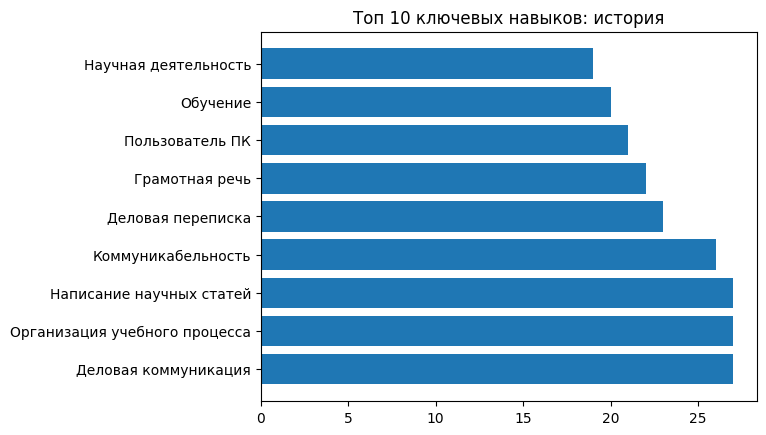

In [ ]:
import matplotlib.pyplot as plt
plt.barh(*zip(*top_10_hist.items()))       # Горизонтальный график barh
plt.title('Топ 10 ключевых навыков: история')
plt.show

## Облако слов

Подсказка https://re-thought.com/creating-wordclouds-in-python/

In [ ]:
!pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(skills_hist)
hist_str = ", ".join(skills_hist)
print(hist_str)

['Английский язык', 'Аналитические исследования', 'Научная деятельность', 'Химические методы анализа', 'Телефонные переговоры', 'Пользователь ПК', 'Анализ рынка', 'Работа с ключевыми клиентами', 'Ориентация на результат', 'Организаторские навыки', 'Активные продажи', 'Навыки работы с возражениями', 'Проведение презентаций', 'Клиентоориентированность', 'Деловая коммуникация', 'Оценка потребностей клиентов', 'Работа в команде', 'Грамотная речь', 'Консультирование клиентов', 'входящие звонки', 'Грамотная речь', 'Навыки межличностного общения', 'Точность и внимательность к деталям', 'Ведение истории болезни', 'Медицинска статистика', 'работа с текущей базой клиентов', 'Работа в команде', 'Активные продажи', 'Планирование', 'Формирование бюджета', 'Финансовая отчетность', '1С: Предприятие 8', 'Консультант плюс', 'Бюджетирование ФОТ', 'MS Excel', 'Коммерчекая недвижимость', 'Умение работать в условиях многозадачности', 'Ведение переговоров', 'Организаторские навыки', 'Активные продажи', 'Пои

In [ ]:
wordcloud = WordCloud(background_color="white", width=800, height=400, max_words = 10).generate(hist_str)
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

ValueError: ignored

### Топ 10 навыков РЕКЛАМА

In [ ]:
keys = sorted(top_skills_mark.keys(), key=top_skills_mark.get, reverse=True)[:10]
top_10_mark = {k : top_skills_mark[k] for k in keys}
#del top_10_hist['Высшее образование']
print(top_10_mark)

{'Работа в команде': 44, 'Грамотная речь': 44, 'Пользователь ПК': 27, 'Обучение и развитие': 23, 'Организаторские навыки': 19, 'Грамотность': 18, 'Умение работать в команде': 17, 'Детская психология': 16, 'Работа с людьми': 15, 'Навыки межличностного общения': 15}


<function matplotlib.pyplot.show(close=None, block=None)>

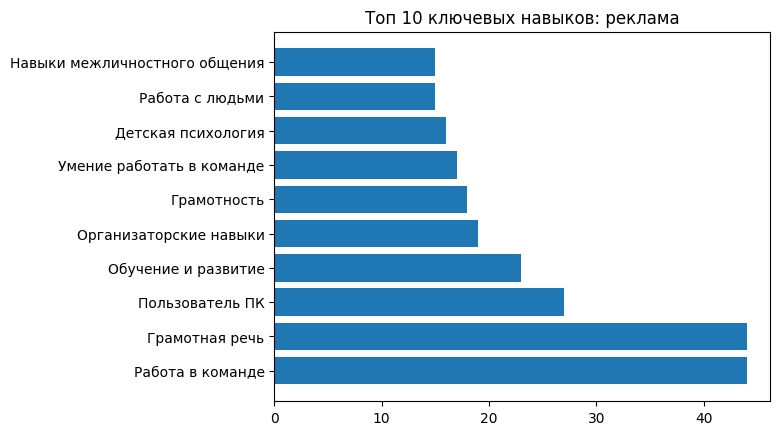

In [ ]:
import matplotlib.pyplot as plt
plt.barh(*zip(*top_10_mark.items()))       # Горизонтальный график barh
plt.title('Топ 10 ключевых навыков: реклама')
plt.show

### Топ 10 навыков РЕДАКТУРА

In [ ]:
keys = sorted(top_skills_edit.keys(), key=top_skills_edit.get, reverse=True)[:10]
top_10_edit = {k : top_skills_edit[k] for k in keys}
#del top_10_hist['Высшее образование']
print(top_10_edit)

{'Грамотность': 47, 'Грамотная речь': 46, 'Написание текстов': 34, 'Работа в команде': 27, 'Работа с большим объемом информации': 26, 'Креативность': 25, 'Организаторские навыки': 19, 'Редактирование текстов': 17, 'Пользователь ПК': 15, 'Написание статей': 14}


<function matplotlib.pyplot.show(close=None, block=None)>

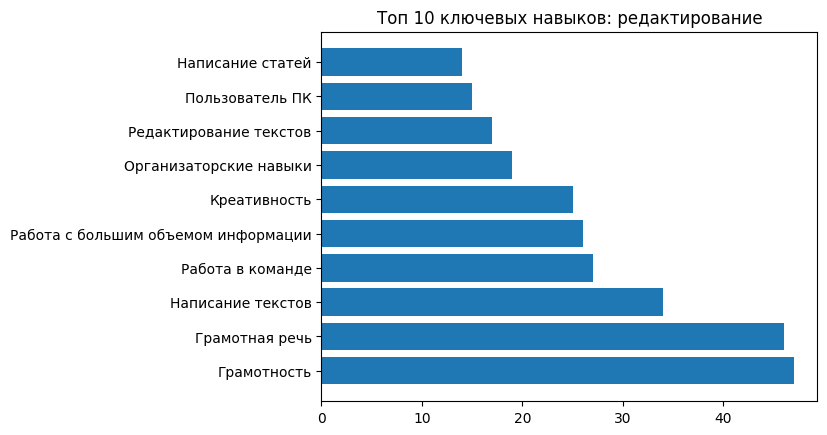

In [ ]:
import matplotlib.pyplot as plt
plt.barh(*zip(*top_10_edit.items()))       # Горизонтальный график barh
plt.title('Топ 10 ключевых навыков: редактирование')
plt.show

### Топ 10 навыков МЕЖДУНАРОДНЫЕ ОТНОШЕНИЯ

In [ ]:
keys = sorted(top_skills_intrel.keys(), key=top_skills_intrel.get, reverse=True)[:10]
top_10_intrel = {k : top_skills_intrel[k] for k in keys}
#del top_10_hist['Высшее образование']
print(top_10_intrel)

{'Написание текстов': 56, 'Грамотность': 46, 'Написание статей': 45, 'Грамотная речь': 42, 'Журналистика': 39, 'Креативность': 36, 'Копирайтинг': 33, 'Написание пресс-релизов': 25, 'Деловая коммуникация': 23, 'Работа с большим объемом информации': 23}


<function matplotlib.pyplot.show(close=None, block=None)>

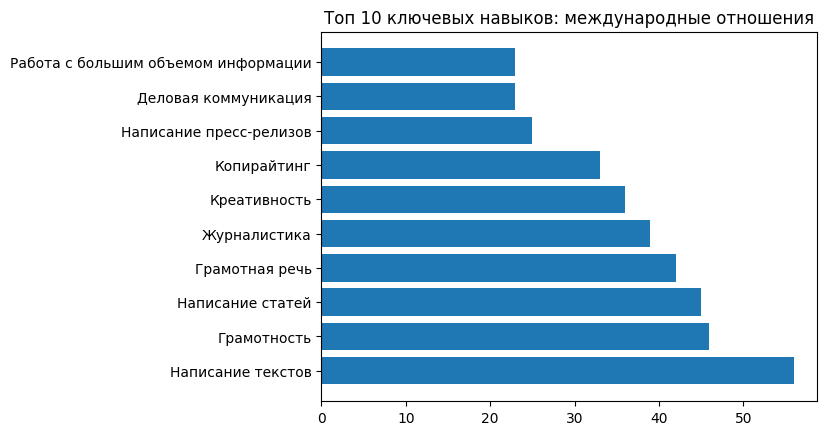

In [ ]:
import matplotlib.pyplot as plt
plt.barh(*zip(*top_10_intrel.items()))       # Горизонтальный график barh
plt.title('Топ 10 ключевых навыков: международные отношения')
plt.show

In [ ]:
top_10_edit
top_10_intrel
top_10_mark

{'Работа в команде': 44,
 'Грамотная речь': 44,
 'Пользователь ПК': 27,
 'Обучение и развитие': 23,
 'Организаторские навыки': 19,
 'Грамотность': 18,
 'Умение работать в команде': 17,
 'Детская психология': 16,
 'Работа с людьми': 15,
 'Навыки межличностного общения': 15}

In [ ]:
# Создаем датафрейм по ключевым направлениям
skills_edit_data = pd.DataFrame(top_10_edit.items())
skills_edit_data.to_csv('skills_editing', sep='\t')
skills_intrel_data = pd.DataFrame(top_10_intrel.items())
skills_intrel_data.to_csv('skills_intrel', sep='\t')
skills_mark_data = pd.DataFrame(top_10_mark.items())
skills_mark_data.to_csv('skills_mark', sep='\t')

# Анализ самых востребованных профессий по направлениям (в разработке)

## Топ 5 профессий

**Комментарий**: почистить списки профессий

### История

In [ ]:
import re
#list_of_fields = ['Реклама', 'Международные отношения', 'Редактирование', 'История']
vacancy = []

indexes = dataset.loc[dataset['Направление'] == 'История'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
  vacancy.append(re.sub(r'\([^)]*?\)', '', dataset['Вакансия'][index]))

print(vacancy)
vacancy.remove('Врач-офтальмолог ')

['Учитель истории и обществознания', 'Преподаватель Истории', 'Заведующий музеем', 'Руководитель книжного отдела "Публицистика, история"', 'Учитель истории и обществознания', 'Учитель истории', 'Экскурсовод в музей истории "ГАЗ"', 'Учитель истории', 'Менеджер по работе с клиентами Мастерской документалистики Семейная история - Fotofaktura', 'Учитель истории', 'Шеф-редактор документального кино', 'Главный хранитель - заместитель заведующего ', 'Обозреватель в отдел "Россия"', 'Учитель истории', 'Обозреватель в отдел "Москва"', 'Учитель истории и обществознания', 'Заместитель директора "МУЗЕЯ ОБ ЭТОМ"', 'Учитель истории и обществознания', 'Старший корреспондент в отдел "Новости"', 'Учитель истории и обществознания', 'Секретарь-администратор на ресепшен', 'PR-Специалист', 'PR-специалист', 'Руководитель отдела кадров', 'Пресс-секретарь/Секретарь министра', 'Офис-менеджер', 'Менеджер по оценке и развитию персонала', 'SMM manager/смм-специалист ', 'Офис-менеджер', 'Юрист', 'Юрисконсульт', 'С

In [ ]:
# Поиск релевантных вакансий в списке
import re
keywords = ['истор', 'муз', 'общ', 'док', 'завед', 'секр']
vacancy_hist = []
for vacancies in vacancy:
  for keyword in keywords:
    if re.findall(keyword, vacancies):
      vacancy_hist.append(vacancies)

print(vacancy_hist)

['Учитель истории и обществознания', 'Учитель истории и обществознания', 'Заведующий музеем', 'Руководитель книжного отдела "Публицистика, история"', 'Учитель истории и обществознания', 'Учитель истории и обществознания', 'Учитель истории', 'Экскурсовод в музей истории "ГАЗ"', 'Экскурсовод в музей истории "ГАЗ"', 'Учитель истории', 'Менеджер по работе с клиентами Мастерской документалистики Семейная история - Fotofaktura', 'Менеджер по работе с клиентами Мастерской документалистики Семейная история - Fotofaktura', 'Учитель истории', 'Шеф-редактор документального кино', 'Главный хранитель - заместитель заведующего ', 'Учитель истории', 'Учитель истории и обществознания', 'Учитель истории и обществознания', 'Учитель истории и обществознания', 'Учитель истории и обществознания', 'Учитель истории и обществознания', 'Учитель истории и обществознания', 'Пресс-секретарь/Секретарь министра', 'Специалист по документационному обеспечению персонала', 'Специалист по регистрации страховых документо

In [ ]:
#unwanted_list = ['Менеджер по продажам', 'Специалист колл-центра', 'Сотрудник в офис ', 'Юрист', 'Врач-офтальмолог', 'Врач-невролог', 'Помощник менеджера по продажам', 'Офис-менеджер', 'Менеджер по работе с клиентами', 'Руководитель отдела маркетинга и рекламы ']
df_vacancy = pd.DataFrame(vacancy_hist)
#print(df_vacancy)
vacancy_counts = df_vacancy.value_counts()[:10]
print(vacancy_counts)

Учитель истории и обществознания                                                             10
Учитель истории                                                                               4
Менеджер по работе с клиентами Мастерской документалистики Семейная история - Fotofaktura     2
Экскурсовод в музей истории "ГАЗ"                                                             2
Главный хранитель - заместитель заведующего                                                   1
Заведующий музеем                                                                             1
Пресс-секретарь/Секретарь министра                                                            1
Руководитель книжного отдела "Публицистика, история"                                          1
Специалист по документационному обеспечению персонала                                         1
Специалист по регистрации страховых документов                                                1
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
plt.barh(vacancy_counts.index, vacancy_counts.values)       # Горизонтальный график barh
plt.title('Вакансии: история')
plt.show

### Реклама

In [ ]:
import re
#list_of_fields = ['Реклама', 'Международные отношения', 'Редактирование', 'История']
vacancy = []

indexes = dataset.loc[dataset['Направление'] == 'Реклама'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
  vacancy.append(re.sub(r'\([^)]*?\)', '', dataset['Вакансия'][index]))

#list_of_skills = list_of_skills.split('')
print(vacancy)

['Специалист по медиапланированию / менеджер по рекламе ', 'Менеджер по рекламе ', 'Ассистент отдела маркетинга', 'Маркетолог', 'Менеджер по продажам рекламных площадей в СМИ ', 'Руководитель отдела рекламы и маркетинга', 'Менеджер по маркетингу, рекламе и PR', 'Младший специалист по контекстной рекламе', 'Менеджер по рекламе', 'Менеджер по рекламе ', 'Менеджер по рекламе', 'Специалист по рекламе', 'Контент-менеджер в отдел маркетинга и рекламы', 'Маркетолог/Менеджер по рекламе ', 'Ассистент интернет-маркетолога', 'Менеджер по маркетингу, рекламе и PR', 'Специалист по интернет-маркетингу и рекламе', 'Руководитель отдела маркетинга и рекламы ', 'Руководитель отдела маркетинга и рекламы', 'Менеджер по маркетингу и рекламе', 'Контент-менеджер в отдел маркетинга и рекламы', 'Специалист по рекламе', 'Специалист отдела маркетинга и рекламы', 'Руководитель отдела маркетинга и рекламы ', 'Менеджер по маркетингу и рекламе ', 'Ассистент отдела наружной рекламы', 'Специалист по рекламе', 'Специал

In [ ]:
df_vacancy = pd.DataFrame(vacancy)
#print(df_vacancy)
vacancy_counts = df_vacancy.value_counts()[:10]
print(vacancy_counts)

Менеджер по рекламе                          15
Менеджер по маркетингу и рекламе             14
Менеджер по рекламе и маркетингу              7
Руководитель отдела маркетинга и рекламы      6
Маркетолог                                    6
Специалист по рекламе                         5
Менеджер по рекламе                           4
Менеджер по маркетингу, рекламе и PR          3
Руководитель отдела маркетинга и рекламы      3
Специалист по рекламе и PR                    3
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
plt.barh(vacancy_counts.index, vacancy_counts.values)       # Горизонтальный график barh
plt.title('Вакансии: реклама')
plt.show

### Редактирование

In [ ]:
import re
#list_of_fields = ['Реклама', 'Международные отношения', 'Редактирование', 'История']
vacancy = []

indexes = dataset.loc[dataset['Направление'] == 'Редактирование'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
  vacancy.append(re.sub(r'\([^)]*?\)', '', dataset['Вакансия'][index]))

#list_of_skills = list_of_skills.split('')
print(vacancy)
vacancy.remove('Автор студенческих работ ')

['Корректор', 'Редактор', 'Пишущий редактор / Копирайтер / Автор', 'Копирайтер', 'Копирайтер', 'Копирайтер / контент-менеджер с экпертизой в нейросетях', 'Копирайтер', 'Редактор сайта газеты Metro-Петербург', 'Редактор', 'Редактор', 'Выпускающий редактор сайта', 'Редактор редакционно-издательского центра', 'Журналист', 'Копирайтер/редактор', 'Редактор сайта', 'Методист', 'Главный редактор', 'Корректор в офис', 'Копирайтер', 'Шеф-редактор / креативный продюсер', 'Главный редактор', 'Литературный  редактор/редактор-корректор в книжное издательство, Екатеринбург', 'Журналист-редактор', 'Копирайтер', 'Редактор в Издательство', 'Старший редактор', 'Контент-менеджер', 'Обозреватель в отдел "Россия"', 'Редактор сайта', 'Копирайтер', 'Редактор в издательство детской литературы', 'Копирайтер / Контент-маркетолог', 'Ведущий специалист/копирайтер', 'Обозреватель в отдел "Москва"', 'Редактор отдела экономики и бизнеса', 'Специалист издательского дела / Литературный работник / Руководитель проектов

In [ ]:
df_vacancy = pd.DataFrame(vacancy)
#print(df_vacancy)
vacancy_counts = df_vacancy.value_counts()[:10]
print(vacancy_counts)

Редактор                                                                                                7
Копирайтер                                                                                              6
Главный редактор                                                                                        4
Редактор сайта                                                                                          3
Контент-менеджер                                                                                        3
Специалист по связям с общественностью                                                                  3
Журналист                                                                                               3
Шеф-редактор / креативный продюсер                                                                      2
Специалист издательского дела / Литературный работник / Руководитель проектов в книжное издательство    2
Редактор в издательство детской литературы    

### Международные отношения

In [ ]:
import re
#list_of_fields = ['Реклама', 'Международные отношения', 'Редактирование', 'История']
vacancy = []

indexes = dataset.loc[dataset['Направление'] == 'Международные отношения'].index   # получаем список индексов (номера сторок) по направлению
for index in indexes:
  vacancy.append(re.sub(r'\([^)]*?\)', '', dataset['Вакансия'][index]))

print(vacancy)
vacancy.remove('Автор студенческих работ ')
vacancy.remove('Специалист по техническому обучению персонала')

['Специалист по международным отношениям', 'Доцент кафедры международных отношений', 'Начальник отдела международных связей', 'Профессор кафедры международных отношений', 'Доцент Кафедры иностранных языков в сфере международных отношений', 'Преподаватель кафедры иностранных языков в сфере международных отношений', 'Старший преподаватель Кафедры международных отношений, мировой политики и дипломатии', 'Доцент кафедры международного права', 'Старший преподаватель ', 'Специалист в международный проект "Alabuga Start"', 'Доцент кафедры иностранных языков в сфере международных отношений', 'Научный сотрудник в Департамент международных отношений ', 'Специалист в международный проект "Alabuga Start"', 'Специалист в международный проект "Alabuga Start"', 'Доцент Кафедры международных отношений, мировой политики и дипломатии', 'Специалист в отдел международных отношений', 'Юрист ', 'Менеджер по экспорту', 'Младший специалист по работе с участниками Азиатско-Тихоокеанского региона', 'Специалист 

In [ ]:
# Поиск релевантных вакансий в списке
import re
keywords = ['междунар', 'регион', 'ВЭД', 'язык', 'кафедр', 'секр']
vacancy_int = []
for vacancies in vacancy:
  for keyword in keywords:
    if re.findall(keyword, vacancies):
      vacancy_int.append(vacancies)

In [ ]:
df_vacancy = pd.DataFrame(vacancy_int)
#print(df_vacancy)
vacancy_counts = df_vacancy.value_counts()[:10]
print(vacancy_counts)

Специалист в международный проект "Alabuga Start"                           11
Преподаватель кафедры иностранных языков                                     4
Старший преподаватель кафедры иностранных языков                             4
Доцент кафедры иностранных языков                                            4
Преподаватель кафедры иностранных языков в сфере международных отношений     3
Доцент кафедры иностранных языков в сфере международных отношений            3
Доцент кафедры международных отношений                                       2
Научный сотрудник в Департамент международных отношений                      2
Доцент Кафедры иностранных языков в сфере международных отношений            2
Доцент кафедры международного права                                          2
dtype: int64


# Выявление самых оплачиваемых вакансий по направлениям

### История

На этапе очистки данных направление История содержала в себе много личшних данных, а именно проыессий, которые не относятся к историческому образованию. Было принято решение пренебречь данными этого напраления.

In [ ]:
import pandas as pd
history = pd.read_csv('hh_history.csv')
history

,Направление,Вакансия,Доход,Ключевые навыки
0,История,Учитель истории и обществознания,84100,Навыки не указаны
1,История,Преподаватель Истории,50000,"['Обучение', 'Организация учебного процесса', ..."
2,История,Заведующий музеем,90000,Навыки не указаны
3,История,"Руководитель книжного отдела ""Публицистика, ис...",65000,Навыки не указаны
4,История,Учитель истории и обществознания,90000,['Способность работать в режиме многозадачност...
...,...,...,...,...
115,История,Инспектор режима и охраны,49000,Навыки не указаны
116,История,Врач-офтальмолог,60000,"['Пользователь ПК', 'Грамотная речь', 'Навыки ..."
117,История,Руководитель отдела маркетинга и рекламы (Удал...,100000,Навыки не указаны
118,История,Менеджер по работе с маркетплейсами (E-commerce),78000,"['Работа с ключевыми клиентами', 'Деловая пере..."


In [ ]:
# sort_values(by=['Population'], ascending=False
import pandas as pd
history_sorted = history.sort_values(by=['Доход'], ascending=False)
history_sorted.reset_index(drop= True , inplace= True )
history_sorted

,Направление,Вакансия,Доход,Ключевые навыки
0,История,Операционный директор / проректор,240000,"['Оптимизация бизнес-процессов', 'Управление б..."
1,История,Менеджер проектных продаж (Москва и Московская...,200000,"['Продажа комплексных проектов', 'B2B Продажи'..."
2,История,Финансовый директор,200000,Навыки не указаны
3,История,Врач-невролог,150000,"['Пользователь ПК', 'Грамотная речь', 'Работа ..."
4,История,Менеджер по работе с клиентами,150000,"['Ведение переговоров', 'Управление продажами'..."
...,...,...,...,...
115,История,PR-Специалист,27410,"['PR', 'Написание текстов', 'Организация мероп..."
116,История,Учитель истории и обществознания,25000,"['Пользователь ПК', 'Грамотная речь', 'Работа ..."
117,История,Заведующий художественно-постановочной частью,25000,"['Высшее образование', 'Разработка документаци..."
118,История,Учитель истории,25000,['Приветствуется опыт работы']


In [ ]:
history_sorted[5:20]

,Направление,Вакансия,Доход,Ключевые навыки
5,История,Менеджер по продажам,150000,Навыки не указаны
6,История,Шеф-редактор документального кино,150000,"['Работа в команде', 'планировать и оптимально..."
7,История,Менеджер по развитию зарубежных продаж (экспорт),150000,"['Английский язык', 'Управление продажами', 'В..."
8,История,Ведущий архитектор,130000,Навыки не указаны
9,История,Мануальный терапевт,120000,"['Пользователь ПК', 'Ведение документации', 'Р..."
10,История,HR Specialist,120000,"['Компенсации и льготы', 'Адаптация персонала'..."
11,История,Врач-невролог + рефлексотерапевт (м. Римская),120000,"['Пользователь ПК', 'Работа в команде', 'Грамо..."
12,История,Врач-невролог,120000,"['Грамотная речь', 'Навыки межличностного обще..."
13,История,Учитель истории и обществознания,115000,"['Грамотная речь', 'Организаторские навыки', '..."
14,История,Корпоративный юрист,105000,"['Учредительные документы', 'Составление догов..."


### Международные отношения

In [ ]:
import pandas as pd
relations = pd.read_csv('hh_International_relations.csv')
relations

,Направление,Вакансия,Доход,Ключевые навыки
0,Международные отношения,Специалист по международным отношениям,28000,"['Английский язык', 'Деловая переписка', 'Рабо..."
1,Международные отношения,Доцент кафедры международных отношений,65000,Навыки не указаны
2,Международные отношения,Начальник отдела международных связей,40000,Навыки не указаны
3,Международные отношения,Профессор кафедры международных отношений,75000,"['Научная деятельность', 'Преподавание', 'Орга..."
4,Международные отношения,Доцент Кафедры иностранных языков в сфере межд...,50000,Навыки не указаны
...,...,...,...,...
115,Международные отношения,Автор студенческих работ (по гуманитарным дисц...,70000,"['Грамотная речь', 'MS PowerPoint', 'Работа с ..."
116,Международные отношения,"Специалист в международный проект ""Alabuga Start""",70000,"['Ориентация на результат', 'Знание иностранны..."
117,Международные отношения,"Специалист в международный проект ""Alabuga Start""",70000,"['Ориентация на результат', 'Знание иностранны..."
118,Международные отношения,Автор студенческих работ (по гуманитарным дисц...,70000,"['Грамотная речь', 'MS PowerPoint', 'Работа с ..."


In [ ]:
import pandas as pd
relations_sorted = relations.sort_values(by=['Доход'], ascending=False)
relations_sorted.reset_index(drop= True , inplace= True )
relations_sorted = relations_sorted.drop(index=[4,5,6,8,13])
relations_sorted.reset_index(drop= True , inplace= True )
relations_sorted[:10]

,Направление,Вакансия,Доход,Ключевые навыки
0,Международные отношения,Начальник отдела международных поставок и серв...,170000,Навыки не указаны
1,Международные отношения,Руководитель направления ВЭД,150000,"['Стратегическое мышление', 'Анализ рынка', 'Л..."
2,Международные отношения,Директор по закупу ВЭД,150000,"['Стратегическое мышление', 'Анализ рынка', 'Л..."
3,Международные отношения,Директор по логистике ВЭД,150000,"['Стратегическое мышление', 'Анализ рынка', 'Л..."
4,Международные отношения,Юрист-международник (в офис Санкт-Петербург /о...,120000,"['Английский язык', 'Грамотная речь', 'Согласо..."
5,Международные отношения,Научный сотрудник в Департамент международных ...,110000,"['Написание научных статей', 'Научные исследов..."
6,Международные отношения,Научный сотрудник в ЦКЕМИ (Программа постдоков),110000,"['Написание научных статей', 'Научные исследов..."
7,Международные отношения,Научный сотрудник в ЦКЕМИ (Программа российски...,110000,"['Написание научных статей', 'Научные исследов..."
8,Международные отношения,Помощник депутата Государственной Думы,100000,"['Организаторские навыки', 'Грамотная речь', '..."
9,Международные отношения,Руководитель отдела экспортных продаж,100000,Навыки не указаны


In [ ]:
# Записываем в csv
relations_sorted.to_csv('relation_salary', sep='\t')

### Реклама

In [ ]:
import pandas as pd
marketing = pd.read_csv('marketing.csv')
marketing

,Направление,Вакансия,Доход,Ключевые навыки
0,Реклама,Специалист по медиапланированию / менеджер по ...,75000,"['Пользователь ПК', 'Баннерная реклама', 'Меди..."
1,Реклама,Менеджер по рекламе (наружная реклама),80000,Навыки не указаны
2,Реклама,Ассистент отдела маркетинга,40000,"['Написание текстов', 'Деловое общение']"
3,Реклама,Маркетолог,80000,"['Яндекс.Метрика', 'Яндекс.Директ', 'Контекстн..."
4,Реклама,Менеджер по продажам рекламных площадей в СМИ ...,50000,"['Навыки переговоров', 'Деловая коммуникация',..."
...,...,...,...,...
115,Реклама,Менеджер по рекламе,40000,"['Photoshop', 'Adobe Photoshop', 'Опытный поль..."
116,Реклама,Менеджер по рекламе,40000,Навыки не указаны
117,Реклама,Менеджер по PR и рекламе,40000,"['Написание текстов', 'SMM', 'Интернет-реклама..."
118,Реклама,Media buyer (offline) / Специалист по планиров...,70000,"['Умение работать в режиме многозадачности', '..."


In [ ]:
import pandas as pd
marketing_sorted = marketing.sort_values(by=['Доход'], ascending=False)
marketing_sorted.reset_index(drop= True , inplace= True )
marketing_sorted = marketing_sorted.drop(index=[2,3,7,10,13,14])
marketing_sorted.reset_index(drop= True , inplace= True )
marketing_sorted[:10]

,Направление,Вакансия,Доход,Ключевые навыки
0,Реклама,Руководитель отдела маркетинга и рекламы,300000,"['Креативность', 'Многозадачность', 'Маркетинг..."
1,Реклама,Руководитель отдела маркетинга и рекламы (само...,200000,"['Продвижение бренда', 'B2B маркетинг', 'Марке..."
2,Реклама,Руководитель отдела маркетинга и рекламы,130000,"['Стратегический маркетинг', 'Продвижение брен..."
3,Реклама,Менеджер по маркетингу,130000,"['MS PowerPoint', 'Ведение переговоров', 'План..."
4,Реклама,Руководитель проектов по навигации и рекламе,126000,"['Организаторские навыки', 'Ведение документац..."
5,Реклама,Руководитель отдела рекламы и маркетинга,120000,"['Продвижение бренда', 'Ребрендинг', 'Планиров..."
6,Реклама,Руководитель отдела маркетинга,120000,"['Анализ конкурентной среды', 'Аналитическое м..."
7,Реклама,Главный специалист по маркетингу,110000,"['Продвижение бренда', 'Маркетинговые коммуник..."
8,Реклама,Главный специалист по интернет-рекламе (digita...,110000,"['Digital Marketing', 'Яндекс.Метрика', 'Googl..."
9,Реклама,Руководитель отдела маркетинга и рекламы,100000,"['Грамотная речь', 'Работа в команде', 'Креати..."


In [ ]:
# Записываем в csv
marketing_sorted.to_csv('marketing_salary', sep='\t')

### Редактирование

In [ ]:
import pandas as pd
editing = pd.read_csv('editing.csv')
editing

,Направление,Вакансия,Доход,Ключевые навыки
0,Редактирование,Корректор,48000,"['Точность и внимательность к деталям', 'Литер..."
1,Редактирование,Редактор,75000,"['Редактирование текстов', 'Грамотность', 'Точ..."
2,Редактирование,Пишущий редактор / Копирайтер / Автор,99000,"['Копирайтинг', 'Написание текстов', 'Написани..."
3,Редактирование,Копирайтер,70000,"['Копирайтинг', 'Редактирование текстов', 'Гра..."
4,Редактирование,Копирайтер,35000,"['Редактирование', 'Копирайтинг', 'Редактирова..."
...,...,...,...,...
115,Редактирование,Контент-менеджер,100000,Навыки не указаны
116,Редактирование,Специалист - дизайнер,45000,"['Внимательность', 'Честность и любовь к своей..."
117,Редактирование,PR-менеджер,85000,"['Написание текстов', 'Медиа-мониторинг', 'Гра..."
118,Редактирование,Специалист отдела маркетинга,40000,"['HTML', 'MS PowerPoint', 'Adobe Photoshop', '..."


In [ ]:
import pandas as pd
editing_sorted = editing.sort_values(by=['Доход'], ascending=False)
editing_sorted.reset_index(drop= True , inplace= True )
editing_sorted = editing_sorted.drop(index=[3,4,8,9,7])
editing_sorted.reset_index(drop= True , inplace= True )
editing_sorted[:10]

,Направление,Вакансия,Доход,Ключевые навыки
0,Редактирование,Редакционный директор/ Шеф-редактор,145000,"['Контакты с журналистами', 'Руководство колле..."
1,Редактирование,Копирайтер,130000,"['Грамотная речь', 'Сбор и анализ информации',..."
2,Редактирование,PR-менеджер в бьюти бренд (в офис),120000,"['Продвижение бренда', 'Грамотная речь', 'Грам..."
3,Редактирование,Ведущий специалист/копирайтер,115000,"['Написание текстов', 'Написание рекламных ста..."
4,Редактирование,Выпускающий редактор сайта,104200,"['Внутренние коммуникации', 'HTML', 'Bitrix24'..."
5,Редактирование,Редактор отдела экономики и бизнеса,100000,"['Ответственность и исполнительность', 'Грамот..."
6,Редактирование,Главный редактор,100000,"['Грамотность', 'Написание текстов', 'Редактир..."
7,Редактирование,Специалист по связям с общественностью/внешний PR,100000,"['Управление отношениями с клиентами', 'Наличи..."
8,Редактирование,Пишущий редактор / Копирайтер / Автор,99000,"['Копирайтинг', 'Написание текстов', 'Написани..."
9,Редактирование,Контент-редактор/SMM-менеджер,95000,"['Копирайтинг', 'Написание текстов', 'Наполнен..."


In [ ]:
# Записываем в csv
editing_sorted.to_csv('editing_salary', sep='\t')